In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
# load the data
data = pd.read_csv(
    "c2_10.18751-Climate-Timeseries-CHTM-1.1-swiss.txt",
    index_col="time",
    sep="\t",
    skiprows=15,
)

# Print the shape of the dataframe
print(data.shape)

# Select the first 12 columns
data_m = data.loc[:, "jan":"dec"]

# Create a new dataframe with new index and columns 'Year', 'Month' and 'Temp'
df = (
    data_m.stack()  # create a multi-index dataframe with the year at level 0 and the month at level 1
    .reset_index()  # reset the index of the new dataframe
    .rename(
        columns={0: "Temp", "time": "Year", "level_1": "Month"}
    )  # give new names to the columns
)
# Create dates
df["Date"] = pd.date_range("1864-jan", periods=df.shape[0], freq="M")

# Let the dates to be the index
df.set_index("Date", inplace=True)

(157, 19)


In [3]:
df.head()

,Year,Month,Temp
Date,,,
1864-01-31,1864,jan,-7.10
1864-02-29,1864,feb,-4.52
1864-03-31,1864,mar,0.04
1864-04-30,1864,apr,2.11
1864-05-31,1864,may,7.43


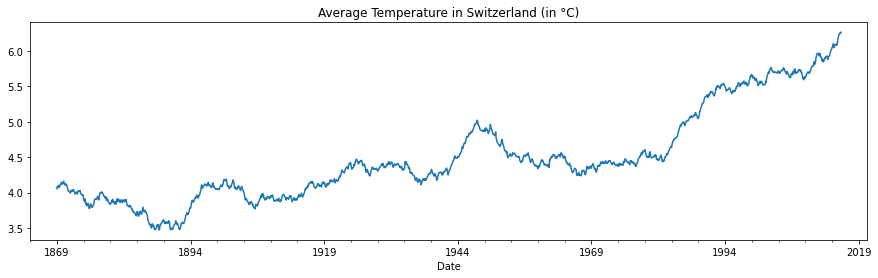

In [7]:
# set the figure size
plt.figure(figsize=(15, 4))

# plot the Temperature
df["Temp"].rolling(120, center=True).mean().plot()  # 120 months : 10 years
plt.title("Average Temperature in Switzerland (in °C)")
plt.show()


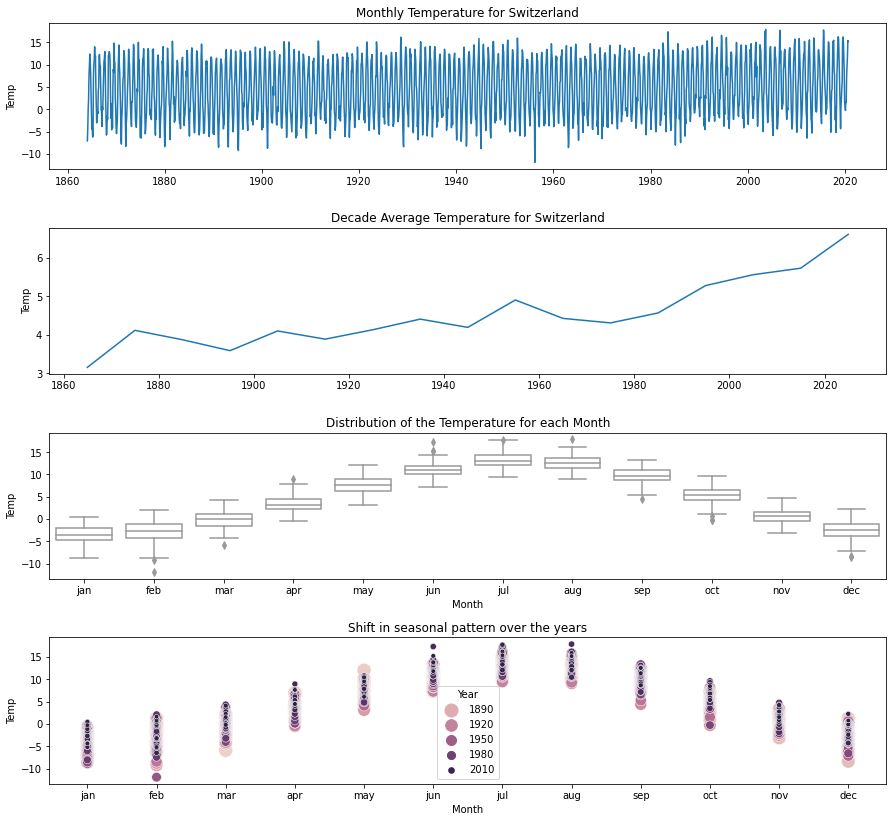

In [8]:
# defining the number of subplots, setting the size, and the space between the subplots
fig, axes = plt.subplots(4, 1, figsize=(15, 14), gridspec_kw={"hspace": 0.4})

# 1st plot: line plot of monthly temperature
axes[0].plot(df["Temp"])
axes[0].set_title("Monthly Temperature for Switzerland")
axes[0].set_ylabel("Temp")

# 2nd plot: line plot of average temperature per decade (A: annual)
axes[1].plot(df["Temp"].resample("10A").mean())
axes[1].set_title("Decade Average Temperature for Switzerland")
axes[1].set_ylabel("Temp")

# 3rd plot: box plot of monthly temperature for every month
sns.boxplot(data=df, x="Month", y="Temp", color="white", ax=axes[2])
axes[2].set_title("Distribution of the Temperature for each Month")

# 4th plot: scatter plot of monthly temperature against month
sns.scatterplot(data=df, x="Month", y="Temp", hue="Year", size="Year", sizes=(200, 20))
axes[3].set_title("Shift in seasonal pattern over the years")

plt.show()